In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate, iterations):
        # Инициализация параметров
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        # Инициализация весов и смещения
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.iterations):
            self.update_weights(X, Y)

    def update_weights(self, X, Y):
        n_samples = X.shape[0]

        # Предсказание
        Y_pred = np.dot(X, self.weights) + self.bias

        # Вычисление градиентов
        dw = (1 / n_samples) * np.dot(X.T, (Y_pred - Y))
        db = (1 / n_samples) * np.sum(Y_pred - Y)

        # Обновление весов и смещения
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        # Предсказание на основе обученных весов и смещения
        return np.dot(X, self.weights) + self.bias


# Загрузка данных
df = pd.read_csv('salary_data.csv')

X = df.iloc[:, :-1].values  # Признаки (стаж работы)
Y = df.iloc[:, 1].values    # Целевая переменная (зарплата)

# Создание и обучение модели
model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X, Y)

# Предсказание
Y_pred = model.predict(X)

# Вывод весов и смещения
print(*np.round(model.weights, 2))  # Веса
print(np.round(model.bias, 2))      # Смещение

9876.11
22920.49


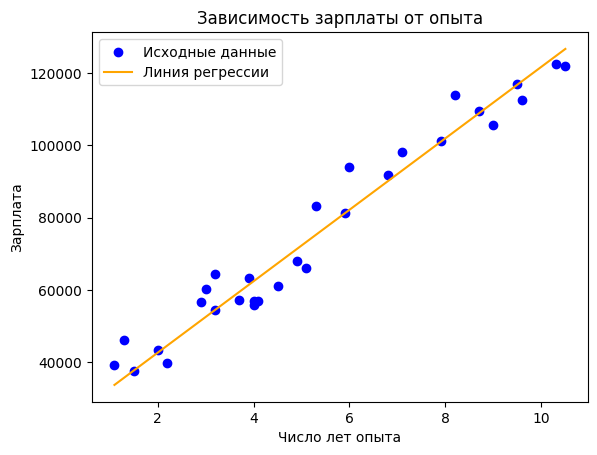

In [8]:
plt.scatter(X, Y, color = 'blue', label='Исходные данные')
plt.plot(X, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()